### Dataset 1

In [ ]:
import pandas as pd
import numpy as np
import requests
from io import BytesIO
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
train_url = 'https://raw.githubusercontent.com/viswa3024/aiml-capstone-project-email/main/question-answering/Dataset-1/aiml-qa-train.xlsx'
response = requests.get(train_url)
if response.status_code == 200:
    tain_data = BytesIO(response.content)
    try:
        train_df = pd.read_excel(tain_data)
    except Exception as e:
        print("Error reading the Excel file:", e)
else:
    print("Failed to fetch the file. Status code:", response.status_code)


In [ ]:
train_df.head()

,question,answer
0,What is the difference between concatenation v...,Concatenation combines two tensors by adding t...
1,What is the difference between concatenation v...,Concatenation is often used to combine differe...
2,Why are derivatives substracted from weights?,The derivative of the loss function at a point...
3,Why are derivatives substracted from weights?,The intuition behind adjusting the weights by ...
4,Describe a process/pipeline for generating rep...,Select a pretrained model suitable for the tas...


In [ ]:
train_df.shape

(1316, 2)

In [ ]:
dev_url = 'https://raw.githubusercontent.com/viswa3024/aiml-capstone-project-email/main/question-answering/Dataset-1/aiml-qa-dev.xlsx'
response = requests.get(dev_url)
if response.status_code == 200:
    dev_data = BytesIO(response.content)
    try:
        dev_df = pd.read_excel(dev_data)
    except Exception as e:
        print("Error reading the Excel file:", e)
else:
    print("Failed to fetch the file. Status code:", response.status_code)


In [ ]:
dev_df.head()

,question,answer1,answer2
0,Does the maximum value of 'n' in the n-gram mo...,The maximum value of n in an n-gram model is n...,The maximum value of 'n' in an n-gram model do...
1,How CNN works?,Convolutional Neural Networks (CNNs) use convo...,CNN is a type of neural network that is common...
2,How is NMT trained? Is it common to use pairs ...,Neural Machine Translation (NMT) is typically ...,"Yes, training NMT models involves using parall..."
3,What is the process of learning POS tags?,The process of learning POS tags involves trai...,POS tags are learned by training machine learn...
4,how to handle multi lingual situations in NLP?,Handling multilingual situations in NLP involv...,It involves techniques such as language identi...


In [ ]:
dev_df.shape

(80, 3)

In [ ]:
test_url = 'https://raw.githubusercontent.com/viswa3024/aiml-capstone-project-email/main/question-answering/Dataset-1/aiml-qa-test.xlsx'
response = requests.get(test_url)
if response.status_code == 200:
    test_data = BytesIO(response.content)
    try:
        test_df = pd.read_excel(test_data)
    except Exception as e:
        print("Error reading the Excel file:", e)
else:
    print("Failed to fetch the file. Status code:", response.status_code)


In [ ]:
test_df.head()

,question,answer1,answer2
0,How we can effectively convert 2D images to 1D?,Converting images to 1D data may not be effect...,"To effectively convert 2D images to 1D, use te..."
1,Can we utilize an autoencoder to perform dimen...,"Yes, autoencoders can be applied to numerical ...","Yes, autoencoders can be used for dimensionali..."
2,What is NLP's current biggest challenge that i...,The main challenges of NLP is finding and coll...,NLP models struggle with tasks that require re...
3,Which problems cannot be solved by Neural netw...,While neural networks have shown great success...,"Neural networks are powerful, but they may str..."
4,Is scaling necessary for SVM?,"Yes, scaling the input data is generally recom...",Scaling the input data is advisable when utili...


In [ ]:
test_df.shape

(120, 3)

In [ ]:
# df_val['answer'] = df_val['answer1'] + ' ' + df_val['answer2']
# df_test['answer'] = df_test['answer1'] + ' ' + df_test['answer2']

In [ ]:
# combined_df = pd.concat([train_df[['question', 'answer']], df_val[['question', 'answer']], df_test[['question', 'answer']]])

In [ ]:
# Add word counts for questions and answers
train_df['question_word_count'] = train_df['question'].apply(lambda x: len(x.split()))
train_df['answer_word_count'] = train_df['answer'].apply(lambda x: len(x.split()))

dev_df['question_word_count'] = dev_df['question'].apply(lambda x: len(x.split()))
dev_df['answer1_word_count'] = dev_df['answer1'].apply(lambda x: len(x.split()))
dev_df['answer2_word_count'] = dev_df['answer2'].apply(lambda x: len(x.split()))

test_df['question_word_count'] = test_df['question'].apply(lambda x: len(x.split()))
test_df['answer1_word_count'] = test_df['answer1'].apply(lambda x: len(x.split()))
test_df['answer2_word_count'] = test_df['answer2'].apply(lambda x: len(x.split()))

In [ ]:
# Set up plot styles
sns.set(style="whitegrid")

###  Question Word Count Distribution (Train, Dev, Test)

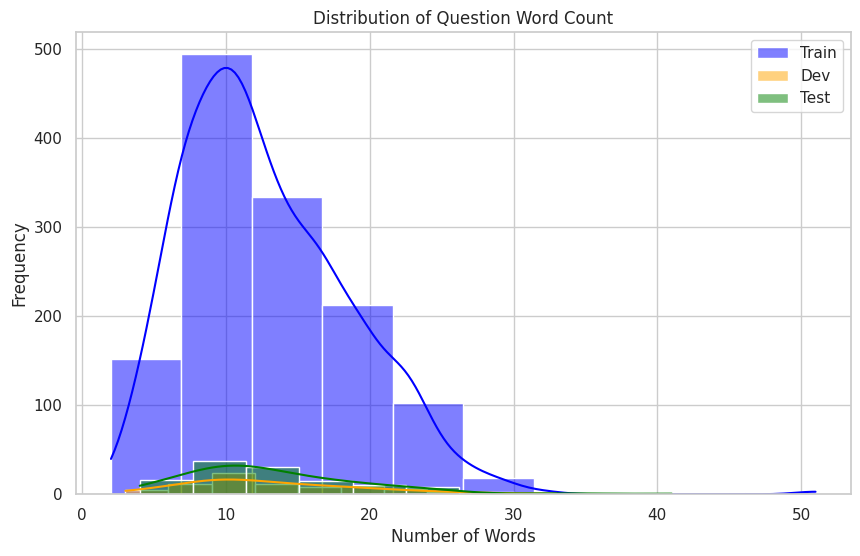

In [ ]:
#KDE:  Kernel Density Estimate: Smooths the data into a continuous curve, giving you an idea of the probability distribution.
#It's helpful for seeing the overall shape of the distribution.
plt.figure(figsize=(10, 6))
sns.histplot(train_df['question_word_count'], bins=10, kde=True, color="blue", label="Train")
sns.histplot(dev_df['question_word_count'], bins=10, kde=True, color="orange", label="Dev")
sns.histplot(test_df['question_word_count'], bins=10, kde=True, color="green", label="Test")
plt.title('Distribution of Question Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Answer Word Count Distribution (Train: single answer, Dev & Test: answer1 and answer2)

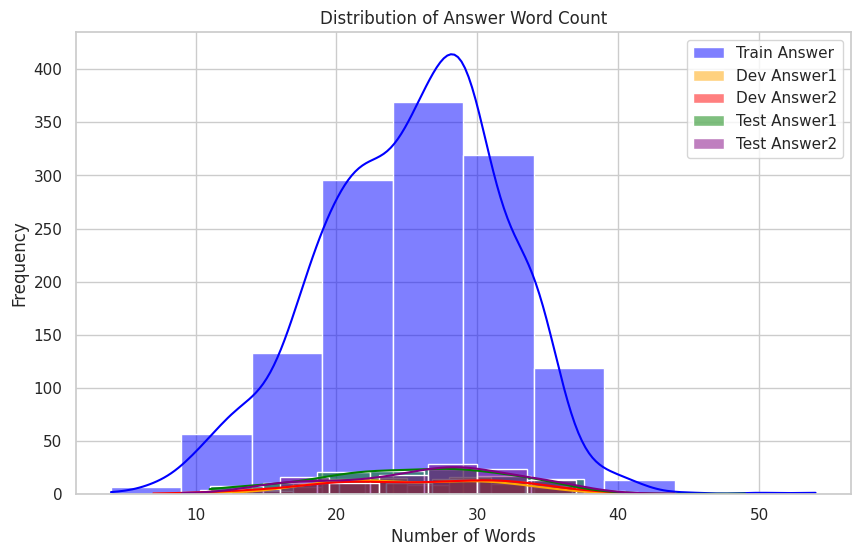

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['answer_word_count'], bins=10, kde=True, color="blue", label="Train Answer")
sns.histplot(dev_df['answer1_word_count'], bins=10, kde=True, color="orange", label="Dev Answer1")
sns.histplot(dev_df['answer2_word_count'], bins=10, kde=True, color="red", label="Dev Answer2")
sns.histplot(test_df['answer1_word_count'], bins=10, kde=True, color="green", label="Test Answer1")
sns.histplot(test_df['answer2_word_count'], bins=10, kde=True, color="purple", label="Test Answer2")
plt.title('Distribution of Answer Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Helper function to clean and tokenize text
def clean_and_tokenize(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Top Keywords in Questions

In [ ]:
question_words_train = train_df['question'].apply(clean_and_tokenize).sum()
question_words_dev = dev_df['question'].apply(clean_and_tokenize).sum()
question_words_test = test_df['question'].apply(clean_and_tokenize).sum()

In [ ]:
# Combine for easier visualization
question_word_freq = Counter(question_words_train + question_words_dev + question_words_test).most_common(10)
question_word_freq_df = pd.DataFrame(question_word_freq, columns=['Word', 'Frequency'])

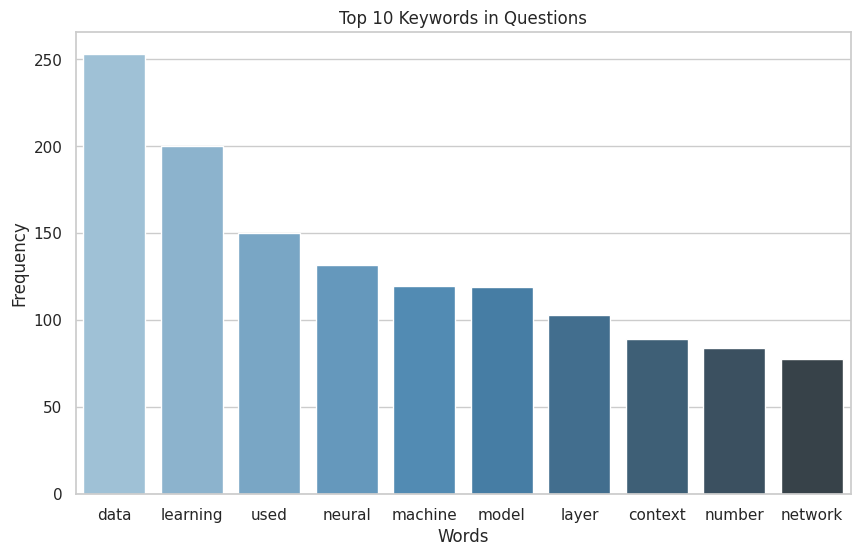

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=question_word_freq_df, hue='Word', dodge=False, palette='Blues_d', legend=False)
plt.title('Top 10 Keywords in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### Top Keywords in Answers (Separate for train, dev answer1, dev answer2, test answer1, test answer2)

In [ ]:
answer_words_train = train_df['answer'].apply(clean_and_tokenize).sum()
answer_words_dev1 = dev_df['answer1'].apply(clean_and_tokenize).sum()
answer_words_dev2 = dev_df['answer2'].apply(clean_and_tokenize).sum()
answer_words_test1 = test_df['answer1'].apply(clean_and_tokenize).sum()
answer_words_test2 = test_df['answer2'].apply(clean_and_tokenize).sum()

# Combine for easier visualization
answer_word_freq = Counter(answer_words_train + answer_words_dev1 + answer_words_dev2 + answer_words_test1 + answer_words_test2).most_common(10)
answer_word_freq_df = pd.DataFrame(answer_word_freq, columns=['Word', 'Frequency'])

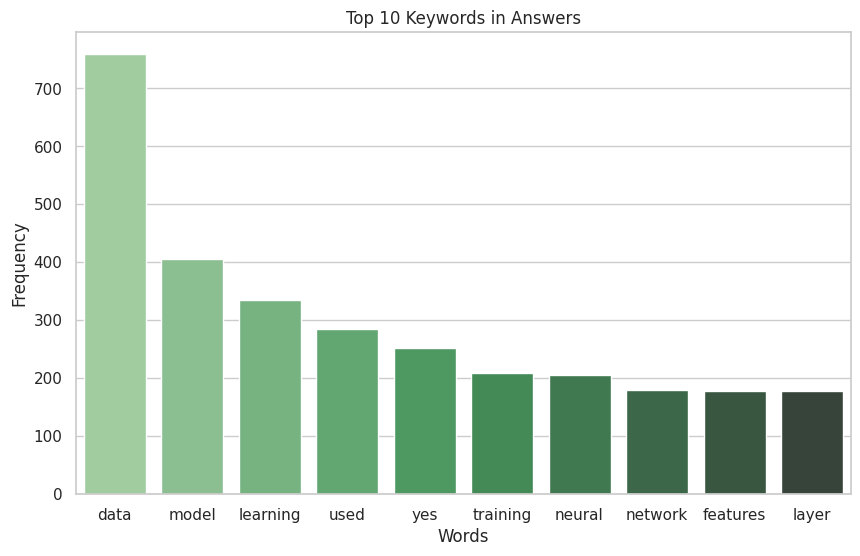

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=answer_word_freq_df, hue='Word', dodge=False, palette='Greens_d', legend=False)
plt.title('Top 10 Keywords in Answers')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()